# L4: Word embeddings

In this lab you will explore word embeddings. A **word embedding** is a mapping of words to points in a vector space such that nearby words (points) are similar in terms of their distributional properties. You will use word embedding to find similar words, and evaluate their usefulness in an inference task.

You will use the word vectors that come with [spaCy](http://spacy.io). Note that you will need the &lsquo;large&rsquo; English language model; the &lsquo;small&rsquo; model that you used in previous labs does not include proper word vectors.

In [1]:
import spacy
#!python3 -m spacy download en_core_web_lg
nlp = spacy.load('en_core_web_lg')
#nlp = en_core_web_lg.load()

Every word in the model&rsquo;s vocabulary comes with a 300-dimensional vector, represented as a NumPy array. The following code cell shows how to access the vector for the word *cheese*:

In [2]:
nlp.vocab['cheese'].vector

array([-5.5252e-01,  1.8894e-01,  6.8737e-01, -1.9789e-01,  7.0575e-02,
        1.0075e+00,  5.1789e-02, -1.5603e-01,  3.1941e-01,  1.1702e+00,
       -4.7248e-01,  4.2867e-01, -4.2025e-01,  2.4803e-01,  6.8194e-01,
       -6.7488e-01,  9.2401e-02,  1.3089e+00, -3.6278e-02,  2.0098e-01,
        7.6005e-01, -6.6718e-02, -7.7794e-02,  2.3844e-01, -2.4351e-01,
       -5.4164e-01, -3.3540e-01,  2.9805e-01,  3.5269e-01, -8.0594e-01,
       -4.3611e-01,  6.1535e-01,  3.4212e-01, -3.3603e-01,  3.3282e-01,
        3.8065e-01,  5.7427e-02,  9.9918e-02,  1.2525e-01,  1.1039e+00,
        3.6678e-02,  3.0490e-01, -1.4942e-01,  3.2912e-01,  2.3300e-01,
        4.3395e-01,  1.5666e-01,  2.2778e-01, -2.5830e-02,  2.4334e-01,
       -5.8136e-02, -1.3486e-01,  2.4521e-01, -3.3459e-01,  4.2839e-01,
       -4.8181e-01,  1.3403e-01,  2.6049e-01,  8.9933e-02, -9.3770e-02,
        3.7672e-01, -2.9558e-02,  4.3841e-01,  6.1212e-01, -2.5720e-01,
       -7.8506e-01,  2.3880e-01,  1.3399e-01, -7.9315e-02,  7.05

## Problem 1: Finding similar words

Your first task is to use the word embeddings to find similar words. More specifically, we ask you to write a function `most_similar` that takes a vector $x$ and returns a list with the 10 most similar entries in spaCy&rsquo;s vocabulary, with similarity being defined by cosine.

**Tip:** spaCy already has a [`most_similar`](https://spacy.io/api/vectors#most_similar) method that you can wrap.

In [3]:
# TODO: Enter your implementation of `most_similar` here
#Source : https://spacy.io/api/vectors
#reshaping ndarray to contain only one column of vectors
def most_similar(vocab_vector,n=10):
    indexes = nlp.vocab.vectors.most_similar(vocab_vector.reshape(1,-1),n=n)
    words = []
    for i in indexes[0][0]:
        words.append(nlp.vocab[i])
    return words

Test your implementation by running the following code cell, which will print the 10 most similar words for the word *cheese*:

In [4]:
print(' '.join(w.text for w in most_similar(nlp.vocab['cheese'].vector)))

CHEESE cheese Cheese Cheddar cheddar CHEDDAR BACON Bacon bacon cheeses


You should get the following output:

Once you have a working implementation of `most_similar`, use it to think about in what sense the returned words really are &lsquo;similar&rsquo; to the cue word. Try to find examples where the cue word and at least one of the words returned by `most_similar` are in the following semantic relations:

1. synonymy (exchangeable meanings)
2. antonymy (opposite meanings)
3. hyperonymy/hyponymy (more specific/less specific meanings)

Document your examples in the code cell below.

In [5]:
# TODO: Insert code here to generate your examples
print(' '.join(w.text for w in most_similar(nlp.vocab['pleased'].vector)))
print(' '.join(w.text for w in most_similar(nlp.vocab['awake'].vector)))
print(' '.join(w.text for w in most_similar(nlp.vocab['algorithm'].vector)))

pleased PLEASED Pleased delighted DELIGHTED Delighted Thrilled THRILLED thrilled Grateful
AWAKE Awake awake WAKING Waking waking Asleep ASLEEP asleep sleep
ALGORITHM algorithm Algorithm Algorithms algorithms ALGORITHMS COMPUTATION Computation computation heuristic


## Problem 2: Plotting similar words

Your next task is to visualize the word embedding space by a plot. To do so, you will have to reduce the dimensionality of the space from 300 to 2&nbsp;dimensions. One suitable algorithm for this is [T-distributed Stochastic Neighbor Embedding](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) (TSNE), which is implemented in scikit-learn&rsquo;s [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) class.

Write a function `plot_most_similar` that takes a list of words (lexemes) and does the following:

1. For each word in the list, find the most similar words (lexemes) in the spaCy vocabulary.
2. Compute the TSNE transformation of the corresponding vectors to 2&nbsp;dimensions.
3. Produce a scatter plot of the transformed vectors, with the vectors as points and the corresponding word forms as labels.

In [7]:
# TODO: Write code here to plot the most similar words
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#Source : https://spacy.io/api/vectors
def plot_most_similar(words):
    x, y = [], []
    similar_words, similar_vec = [], []
    for word in words:
        similar_vec.extend([w.vector for w in most_similar(word.vector)])
        similar_words.extend([w.text for w in most_similar(word.vector)])

    X_embedded = TSNE(n_components=2).fit_transform(similar_vec)
    x.extend(X_embedded[:,0])
    y.extend(X_embedded[:,1])
    plt.figure(figsize=(13,13))
    plt.scatter(x,y)
    #https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point
    i = 0
    for w in similar_words:
        plt.annotate(w, (x[i], y[i]))
        i += 1

Test your code by running the following cell:

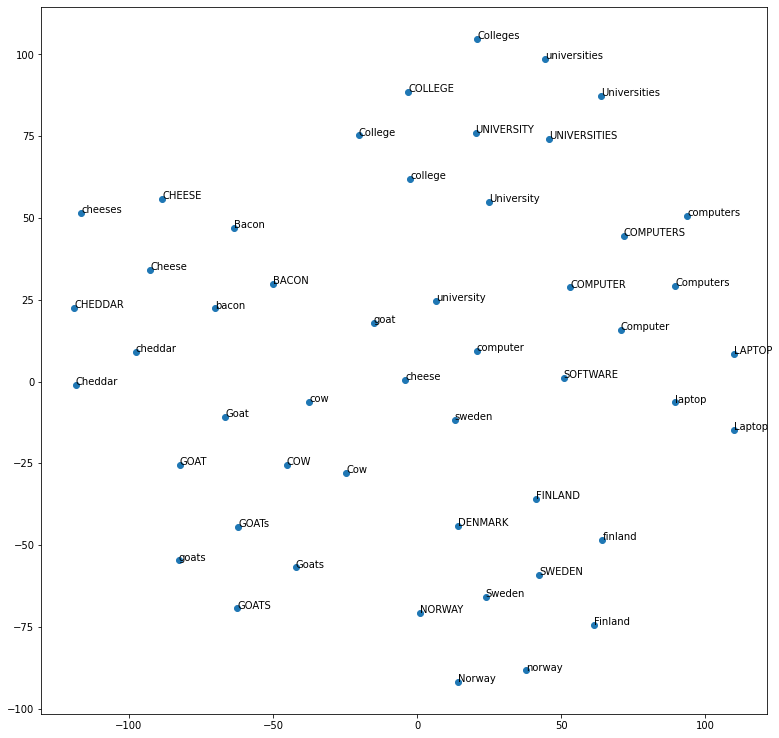

In [8]:
plot_most_similar(nlp.vocab[w] for w in ['cheese', 'goat', 'sweden', 'university', 'computer'])

Take a few minutes to look at your plot. What does it tell you? What does it *not* tell you?

## Problem 3: Analogies

In a **word analogy task** you are given three words $x$, $y$, $z$ and have to predict a word $w$ that has the same semantic relation to $z$ as $y$ has to $x$. One example is *man*, *woman*, *brother*, the expected answer being *sister* (the semantic relation is *male*/*female*).

[Mikolov et al. (2013)](http://www.aclweb.org/anthology/N13-1090) have shown that some types of word analogy tasks can be solved by adding and substracting word vectors in a word embedding: the vector for *sister* is the closest vector (in terms of cosine distance) to the vector *brother* $-$ *man* $+$ *woman*. Your next task is to write a function `fourth` that takes in three words (say *brother*, *man*, *woman*) and predicts the word that completes the analogy (in this case, *sister*).

In [9]:
# TODO: Enter code here to solve the analogy problem

def fourth(w1, w2, w3):
    calc = w1.vector - w2.vector + w3.vector
    similar_word = most_similar(calc,1)
    #print(similar_word) #list of 1 most similar word
    return similar_word[0]

Test your code by running the following code. You should get *sister*.

In [10]:
fourth(nlp.vocab['brother'], nlp.vocab['man'], nlp.vocab['woman']).text

'SISTER'

In [11]:
print(fourth(nlp.vocab['Stockholm'], nlp.vocab['Sweden'], nlp.vocab['Germany']).text)
print(fourth(nlp.vocab['Swedish'], nlp.vocab['Sweden'], nlp.vocab['France']).text)
print(fourth(nlp.vocab['better'], nlp.vocab['good'], nlp.vocab['bad']).text)
print(fourth(nlp.vocab['walked'], nlp.vocab['walk'], nlp.vocab['take']).text)

BERLIN
FRENCH
WORSE
TOOK


You should also be able to get the following:

* *Stockholm* $-$ *Sweden* $+$ *Germany* $=$ *Berlin*
* *Swedish* $-$ *Sweden* $+$ *France* $=$ *French*
* *better* $-$ *good* $+$ *bad* $=$ *worse*
* *walked* $-$ *walk* $+$ *take* $=$ *took*

Experiment with other examples to see whether you get the expected output. Provide three examples of analogies for which the model produces the &lsquo;correct&rsquo; answer, and three examples on which the model &lsquo;failed&rsquo;. Based on your theoretical understanding of word embeddings, do you have a hypothesis as to why the model succeeds/fails in completing the analogy? Discuss this question in a short text.

In [12]:
# Correct answer
print(fourth(nlp.vocab['dog'], nlp.vocab['puppy'], nlp.vocab['kitten']).text)
print(fourth(nlp.vocab['summer'], nlp.vocab['hot'], nlp.vocab['cold']).text)
print(fourth(nlp.vocab['German'], nlp.vocab['Germany'], nlp.vocab['Spain']).text)


# Wrong answer
print(fourth(nlp.vocab['cyclist'], nlp.vocab['bike'], nlp.vocab['run']).text) #should be runner
print(fourth(nlp.vocab['yell'], nlp.vocab['talk'], nlp.vocab['quiet']).text) #should be whisper
print(fourth(nlp.vocab['king'], nlp.vocab['man'], nlp.vocab['woman']).text) #should be queen

CAT
WinteR
SPANISH
RUN
QUIET
KIng


 Interesting that the classic king-man + woman example did not work in this test. This may because our data set is not large enough, or our method of getting word embeddings it not good enough. The ones that work make logical sense, and work because they are basic and are made up of easily distinguishable words like subtracting the country from German and adding Spain to get spanish for example. The ones that don't work are more subtle and harder to correctly guess.

## Natural language inference dataset

In the second part of this lab, you will be evaluating the usefulness of word embeddings in the context of a natural language inference task. The data for this part is the [SNLI corpus](https://nlp.stanford.edu/projects/snli/), a collection of 570k human-written English image caption pairs manually labeled with the labels *Entailment*, *Contradiction*, and *Neutral*. Consider the following sentence pair as an example:

* Sentence 1: A soccer game with multiple males playing.
* Sentence 2: Some men are playing a sport.

This pair is labeled with *Entailment*, because sentence&nbsp;2 is logically entailed (implied) by sentence&nbsp;1 – if sentence&nbsp;1 is true, then sentence&nbsp;2 is true, too. The following sentence pair, on the other hand, is labeled with *Contradiction*, because both sentences cannot be true at the same time.

* Sentence 1: A black race car starts up in front of a crowd of people.
* Sentence 2: A man is driving down a lonely road.

For detailed information about the corpus, refer to [Bowman et al. (2015)](https://www.aclweb.org/anthology/D15-1075/). For this lab, we load the training portion and the development portion of the dataset.

**Note:** Because the SNLI corpus is rather big, we initially only load a small portion (25,000 samples) of the training data. Once you have working code for Problems&nbsp;4–6, you should set the flag `final` to `True` and re-run all cells with the full dataset.

In [13]:
import bz2
import pandas as pd

final_evaluation = False    # TODO: Set to True for the final evaluation!

with bz2.open('train.jsonl.bz2', 'rt') as source:
    if final_evaluation:
        df_train = pd.read_json(source, lines=True)
    else:
        df_train = pd.read_json(source, lines=True, nrows=25000)
    print('Number of sentence pairs in the training data:', len(df_train))

with bz2.open('dev.jsonl.bz2', 'rt') as source:
    df_dev = pd.read_json(source, lines=True)
    print('Number of sentence pairs in the development data:', len(df_dev))

Number of sentence pairs in the training data: 25000
Number of sentence pairs in the development data: 9842


When you inspect the data frames, you will see that we have preprocessed the sentences and separated tokens by spaces. In the columns `tagged1` and `tagged2`, we have added the part-of-speech tags for every token (as predicted by spaCy), also separated by spaces.

In [14]:
df_train.head()

,gold_label,sentence1,tags1,sentence2,tags2
0,neutral,A person on a horse jumps over a broken down a...,DET NOUN ADP DET NOUN VERB ADP DET ADJ ADP NOU...,A person is training his horse for a competiti...,DET NOUN AUX VERB PRON NOUN ADP DET NOUN PUNCT
1,contradiction,A person on a horse jumps over a broken down a...,DET NOUN ADP DET NOUN VERB ADP DET ADJ ADP NOU...,"A person is at a diner , ordering an omelette .",DET NOUN AUX ADP DET NOUN PUNCT VERB DET NOUN ...
2,entailment,A person on a horse jumps over a broken down a...,DET NOUN ADP DET NOUN VERB ADP DET ADJ ADP NOU...,"A person is outdoors , on a horse .",DET NOUN AUX ADV PUNCT ADP DET NOUN PUNCT
3,neutral,Children smiling and waving at camera,NOUN VERB CCONJ VERB ADP NOUN,They are smiling at their parents,PRON AUX VERB ADP PRON NOUN
4,entailment,Children smiling and waving at camera,NOUN VERB CCONJ VERB ADP NOUN,There are children present,PRON AUX NOUN ADJ


## Problem 4: Two simple baselines

Your first task is to establish two simple baselines for the natural language inference task.

### Random baseline

Implement the standard random baseline that generates prediction by sampling from the empirical distribution of the classes in the training data. Write code to evaluate the performance of this classifier on the development data.

In [15]:
# TODO: Enter code here to implement the random baseline. Print the classification report.
from sklearn.metrics import classification_report
import numpy as np
from sklearn.dummy import DummyClassifier

X = df_train[['sentence1', 'tags1', 'sentence2', 'tags2']]
y = df_train['gold_label']

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X, y)

dev = df_dev[['sentence1', 'tags1', 'sentence2', 'tags2']]
dev_targets = df_dev['gold_label']
pred = dummy_clf.predict(dev)

print(classification_report(dev_targets, pred))

               precision    recall  f1-score   support

contradiction       0.34      0.35      0.35      3278
   entailment       0.33      0.33      0.33      3329
      neutral       0.33      0.33      0.33      3235

     accuracy                           0.34      9842
    macro avg       0.34      0.34      0.34      9842
 weighted avg       0.34      0.34      0.34      9842



### One-sided baseline

A second obvious baseline for the inference task is to predict the class label of a sentence pair based on the text of only one of the two sentences, just as in a standard document classification task. Put together a simple [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) + [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) pipeline that implements this idea, train it, and evaluate it on the development data. Is it better to base predictions on sentence&nbsp;1 or sentence&nbsp;2? Why should one sentence be more useful than the other?

In [16]:
# TODO: Enter code here to implement the one-sentence baselines. Print the classification reports.
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

pipe = Pipeline([('count_vect', CountVectorizer()),
                ('logist_reg', LogisticRegression())])
X = df_train['sentence1']
print(X.shape, y.shape)
pipe.fit(X, y)
sent1 = df_dev["sentence1"]
print(classification_report(dev_targets, pipe.predict(sent1)))

(25000,) (25000,)


/Users/lawrence/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


               precision    recall  f1-score   support

contradiction       0.33      0.25      0.29      3278
   entailment       0.34      0.34      0.34      3329
      neutral       0.33      0.41      0.36      3235

     accuracy                           0.33      9842
    macro avg       0.33      0.33      0.33      9842
 weighted avg       0.33      0.33      0.33      9842



In [17]:
#training on sentence 2 and evaluating
X= df_train['sentence2']
pipe.fit(X, y)
sent2 = df_dev["sentence2"]
print(classification_report(dev_targets, pipe.predict(sent2)))

/Users/lawrence/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


               precision    recall  f1-score   support

contradiction       0.60      0.60      0.60      3278
   entailment       0.59      0.64      0.62      3329
      neutral       0.62      0.56      0.59      3235

     accuracy                           0.60      9842
    macro avg       0.60      0.60      0.60      9842
 weighted avg       0.60      0.60      0.60      9842



Training on sentence two to predict the true label seems to perform way better than sentence one. Accuracy when trained on setence one was 0.34, and it improved to 0.64 with just sentence two. Sentence two might be better for this task because it seems to be more general be shorter, the first sentence may have irrelevant information that makes predicting from it harder.

## Problem 5: A classifier based on manually engineered features

[Bowman et al., 2015](https://www.aclweb.org/anthology/D15-1075/) evaluate a classifier that uses (among others) **cross-unigram features**. This term is used to refer to pairs of unigrams $(w_1, w_2)$ such that $w_1$ occurs in sentence&nbsp;1, $w_2$ occurs in sentence&nbsp;2, and both have been assigned the same part-of-speech tag.

Your next task is to implement the cross-unigram classifier. To this end, the next cell contains skeleton code for a transformer that you can use as the first component in a classification pipeline. This transformer converts each row of the SNLI data frame into a space-separated string consisting of

* the standard unigrams (of sentence&nbsp;1 or sentence&nbsp;2 – choose whichever performed better in Problem&nbsp;4)
* the cross-unigrams, as described above.

The space-separated string forms a new &lsquo;document&rsquo; that can be passed to a vectorizer in exactly the same way as a standard sentence in Problem&nbsp;4.

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

class CrossUnigramsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    # Transform a single row of the dataframe.
    def _transform(self, sentence_1,pos_1,sentence_2,pos_2):
        # TODO: Replace the following line with your own code
        w1 = sentence_1.split(" ")
        w2 = sentence_2.split(" ")
        p1 = pos_1.split(" ")
        p2 = pos_2.split(" ")
        new_sentence = sentence_2
        for i in range(0,len(p1)):
            for j in range(0,len(p2)):
                if(p1[i] == p2[j]):
                    new_sentence+='('+w1[i]+','+w2[j]+')'
        return new_sentence

    def transform(self, X):
        return [self._transform(sentence_1,pos_1,sentence_2,pos_2) for sentence_1,pos_1,sentence_2,pos_2 in X]

In [19]:
#transformer = CrossUnigramsTransformer()
#x_train = df_train.drop(['gold_label'], axis=1)
#processed_train = transformer.transform(x_train.values)
#processed_train

Once you have an implementation of the transformer, extend the pipeline that you built for Problem&nbsp;4, train it, and evaluate it on the development data.

In [20]:
# TODO: Enter code here to implement the cross-unigrams classifier. Print the classification report.
transformer = CrossUnigramsTransformer()
x_train = df_train.drop(['gold_label'], axis=1)
x_test = df_dev.drop(['gold_label'], axis=1)
processed_train = transformer.transform(x_train.values)
processed_test = transformer.transform(x_test.values)

pipe.fit(processed_train,y)
               
print(classification_report(dev_targets, pipe.predict(processed_test)))

/Users/lawrence/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


               precision    recall  f1-score   support

contradiction       0.53      0.56      0.55      3278
   entailment       0.55      0.54      0.55      3329
      neutral       0.54      0.51      0.53      3235

     accuracy                           0.54      9842
    macro avg       0.54      0.54      0.54      9842
 weighted avg       0.54      0.54      0.54      9842



## Problem 6: A classifier based on word embeddings

Your last task in this lab is to build a classifier for the natural language inference task that uses word embeddings. More specifically, we ask you to implement a vectorizer that represents each sentence as the sum of its word vectors – a representation known as the **continuous bag-of-words**. Thus, given that spaCy&rsquo;s word vectors have 300 dimensions, each sentence will be transformed into a 300-dimensional vector. To represent a sentence pair, the vectorizer should concatenate the vectors for the individual sentences; this yields a 600-dimensional vector. This vector can then be passed to a classifier.

The next code cell contains skeleton code for the vectorizer. You will have to implement two methods: one that maps a single sentence to a vector (of length 300), and one that maps a sentence pair to a vector (of length 600).

In [21]:
import numpy as np

from sklearn.base import BaseEstimator, TransformerMixin

class PairedSentenceVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    # Vectorize a single sentence.
    def _transform1(self, sentence):        
        return np.sum([ words.vector for words in nlp(sentence)], axis=0)

    # Vectorize a pair of sentences.
    def _transform2(self, sentence1, sentence2):
        return np.stack([self._transform1(sentence1), self._transform1(sentence2)])

    def transform(self, X):
        return np.concatenate([self._transform2(s1, s2).reshape(1, -1) for s1, s2 in X])

Once you have a working implementation, build a pipeline consisting of the new vectorizer and a [multi-layer perceptron classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). This more powerful (compared to logistic regression) classifier is called for here because we do not specify features by hand (as we did in Problem&nbsp;5), but want to let the model learn a good representation of the data by itself. Use 3&nbsp;hidden layers, each with size 300. It suffices to train the classifier for 8&nbsp;iterations (epochs).

In [22]:
# TODO: Enter code here to implement the word embeddings classifier. Print the classification report.
sentence_transformer = PairedSentenceVectorizer()
x_train = df_train.drop(['gold_label', 'tags1', 'tags2'], axis=1)
x_test = df_dev.drop(['gold_label', 'tags1', 'tags2'], axis=1)
new_x_train = sentence_transformer.transform(x_train.values)
new_x_test = sentence_transformer.transform(x_test.values)

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(300,300,300), max_iter=8)

clf.fit(new_x_train, y)
print(classification_report(dev_targets, clf.predict(new_x_test)))

/Users/lawrence/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


               precision    recall  f1-score   support

contradiction       0.71      0.54      0.61      3278
   entailment       0.60      0.78      0.68      3329
      neutral       0.63      0.59      0.61      3235

     accuracy                           0.64      9842
    macro avg       0.65      0.64      0.63      9842
 weighted avg       0.65      0.64      0.63      9842



## Problem 7: Final evaluation

Once you have working code for all problems, re-run Problems&nbsp;4–6 with the full training data. This will take quite a while (expect approximately 1&;nbsp;hour on Colab). **Make sure to not overwrite your previous results.** What are your results on the full data? How do they differ from the results that you obtained for the smaller training data? How do you interpret this? Summarize your findings in a short text.

In [23]:
# FINAL EVAL DATA #
with bz2.open('train.jsonl.bz2', 'rt') as source:
    df_train = pd.read_json(source, lines=True)
    print('Number of sentence pairs in the training data:', len(df_train))

with bz2.open('dev.jsonl.bz2', 'rt') as source:
    df_dev = pd.read_json(source, lines=True)
    print('Number of sentence pairs in the development data:', len(df_dev))

Number of sentence pairs in the training data: 549367
Number of sentence pairs in the development data: 9842


In [24]:
############## PROBLEM 4 #########################
X = df_train[['sentence1', 'tags1', 'sentence2', 'tags2']]
y = df_train['gold_label']
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X, y)
dev = df_dev[['sentence1', 'tags1', 'sentence2', 'tags2']]
dev_targets = df_dev['gold_label']
pred = dummy_clf.predict(dev)

print("Dummy random classifier")
print(classification_report(dev_targets, pred))

#random baseline
pipe = Pipeline([('count_vect', CountVectorizer()),
                ('logist_reg', LogisticRegression())])
X = df_train['sentence1']
pipe.fit(X, y)
sent1 = df_dev["sentence1"]
print("One Sided Baseline sentence 1")
print(classification_report(dev_targets, pipe.predict(sent1)))

#training on sentence 2 and evaluating
X= df_train['sentence2']
pipe.fit(X, y)
sent2 = df_dev["sentence2"]
print("One Sided Baseline sentence 2")
print(classification_report(dev_targets, pipe.predict(sent2)))

########## PROBLEM 5 ########################
transformer = CrossUnigramsTransformer()
x_train = df_train.drop(['gold_label'], axis=1)
x_test = df_dev.drop(['gold_label'], axis=1)
processed_train = transformer.transform(x_train.values)
processed_test = transformer.transform(x_test.values)

pipe.fit(processed_train,y)
print("CrossUnigramsTransformer")    
print(classification_report(dev_targets, pipe.predict(processed_test)))

########## PROBLEM 6 ########################
sentence_transformer = PairedSentenceVectorizer()
x_train = df_train.drop(['gold_label', 'tags1', 'tags2'], axis=1)
x_test = df_dev.drop(['gold_label', 'tags1', 'tags2'], axis=1)
new_x_train = sentence_transformer.transform(x_train.values)
new_x_test = sentence_transformer.transform(x_test.values)

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(300,300,300), max_iter=8)

clf.fit(new_x_train, y)
print(classification_report(dev_targets, clf.predict(new_x_test)))

Dummy random classifier
               precision    recall  f1-score   support

contradiction       0.32      0.33      0.32      3278
   entailment       0.33      0.32      0.33      3329
      neutral       0.32      0.32      0.32      3235

     accuracy                           0.32      9842
    macro avg       0.32      0.32      0.32      9842
 weighted avg       0.33      0.32      0.32      9842



/Users/lawrence/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


One Sided Baseline sentence 1
               precision    recall  f1-score   support

contradiction       0.34      0.27      0.30      3278
   entailment       0.34      0.40      0.37      3329
      neutral       0.33      0.34      0.34      3235

     accuracy                           0.34      9842
    macro avg       0.34      0.34      0.34      9842
 weighted avg       0.34      0.34      0.34      9842



/Users/lawrence/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


One Sided Baseline sentence 2
               precision    recall  f1-score   support

contradiction       0.64      0.63      0.64      3278
   entailment       0.63      0.70      0.66      3329
      neutral       0.66      0.60      0.63      3235

     accuracy                           0.64      9842
    macro avg       0.64      0.64      0.64      9842
 weighted avg       0.64      0.64      0.64      9842



/Users/lawrence/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


CrossUnigramsTransformer
               precision    recall  f1-score   support

contradiction       0.60      0.58      0.59      3278
   entailment       0.56      0.67      0.61      3329
      neutral       0.62      0.53      0.57      3235

     accuracy                           0.59      9842
    macro avg       0.60      0.59      0.59      9842
 weighted avg       0.60      0.59      0.59      9842



/Users/lawrence/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


               precision    recall  f1-score   support

contradiction       0.76      0.78      0.77      3278
   entailment       0.79      0.77      0.78      3329
      neutral       0.72      0.73      0.72      3235

     accuracy                           0.76      9842
    macro avg       0.76      0.76      0.76      9842
 weighted avg       0.76      0.76      0.76      9842



When using the full data set it seems that the models perform better with more data. This is not surprising as with most machine learning models more data almost always results in better performance. There is a tradeoff though as we see large training time increases for a very slight increase in performance which might not always be worth it.

The dummy random classifier appeared to predict about the exact same as the previous results.The one sided baseline classifier went from an accuracy of 0.33 to 0.34 when training on sentence 1.

When this classifier was trained on sentence two we saw a jump in performance from 0.60 accuracy, to now being 0.64.The cross unigrams transformer went from an accuracy of 0.54 to a 0.59. Small increase overall in performance.

When all the sentence were trained on Multi-Layer Perceptron using PairedSentenceVectorizer, it yielded a very good accuracy of 0.76 when compared with other classifiers and vectorizers. Hence, We can see that PairedSentenceVectorizer did a good job, but on the other hand, it is seen as computationally expensive.

<div class="alert alert-info">
    Please read the section ‘General information’ on the ‘Labs’ page of the course website before submitting this notebook!
</div>